Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1891 - mae: 0.3602 - val_loss: 0.0794 - val_mae: 0.2379
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0872 - mae: 0.2535 - val_loss: 0.0801 - val_mae: 0.2392
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0865 - mae: 0.2500 - val_loss: 0.0786 - val_mae: 0.2370
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0827 - mae: 0.2460 - val_loss: 0.0786 - val_mae: 0.2370
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0838 - mae: 0.2462 - val_loss: 0.0770 - val_mae: 0.2347
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0867 - mae: 0.2541 - val_loss: 0.0760 - val_mae: 0.2330
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0828 - mae: 0.2488 - val_loss: 0.0754 - val_mae: 0.2317
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0786 - mae: 0.2402 - val_loss: 0.0843 - val_mae: 0.2448
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0820 - mae: 0.2424 - 

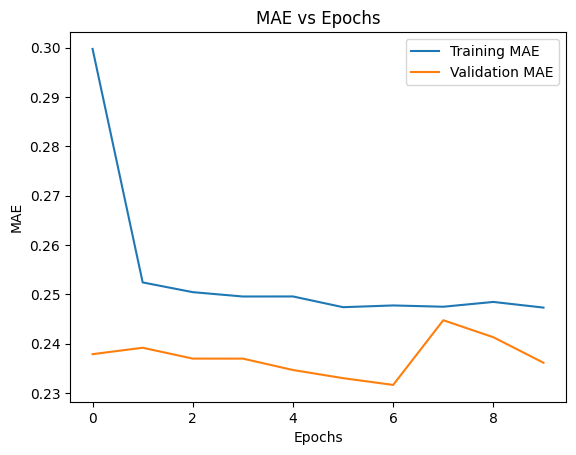

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 75)             │        23,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,530 (271.61 KB)

 Trainable params: 23,176 (90.53 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 46,354 (181.07 KB)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Sample time-series data (replace with real data)
inputs = np.random.rand(1000, 10, 1)
targets = np.random.rand(1000)

# Data split
X_tr, X_te, y_tr, y_te = train_test_split(
    inputs, targets, test_size=0.2, random_state=42
)

# LSTM network
lstm_model = Sequential()
lstm_model.add(LSTM(75, input_shape=(inputs.shape[1], inputs.shape[2])))
lstm_model.add(Dense(1))

# Model setup
lstm_model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=["mae"]
)

# Early stopping
stopper = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

# Training
history = lstm_model.fit(
    X_tr,
    y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(X_te, y_te),
    callbacks=[stopper],
    verbose=1
)

# Predictions
y_pred = lstm_model.predict(X_te)

# Metrics
test_mse = mean_squared_error(y_te, y_pred)
test_mae = mean_absolute_error(y_te, y_pred)

print(f"Test MSE: {test_mse:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# MAE trend
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.title("MAE vs Epochs")
plt.legend()
plt.show()

# Model summary
lstm_model.summary()
